<a href="https://colab.research.google.com/github/makozi/Boston-AirBnB-Analysis/blob/develop-1/Boston_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Airbnb

## This project will follow the CRISP-DM Process

We will follow the following steps:

1.Business Understanding

2.Data Understanding

3.Prepare Data

4.Data Modeling

5.Evaluate the Results

In [0]:
# All of my findings will be in a GitHub repository and Medium post.
# Step 1: Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

In [0]:
!pip install -q  gmaps
import gmaps

### Importing Dataset

In [0]:
url1= 'https://raw.githubusercontent.com/Mikemraz/boston-airbnb-analysis/master/calendar.csv'
url2= 'https://raw.githubusercontent.com/Mikemraz/boston-airbnb-analysis/master/reviews.csv'
url3='https://raw.githubusercontent.com/Mikemraz/boston-airbnb-analysis/master/listings.csv'


df_calendar = pd.read_csv(url1)
df_reviews = pd.read_csv(url2)
df_listings = pd.read_csv(url3)


In [0]:
df_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [0]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [0]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

In [0]:
print(df_listings.shape)
df_listings.describe()

(3585, 95)


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [0]:

# Listing the columns in Listing data set
columns_listings= list(df_listings.columns)
print(columns_listings)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

Here is where we will outline our 3 questions we hope to answer:

1. Is there a spatial discrepancy in price based on neighborhood?

2. What is the seasonality of price in Boston?


In [0]:
df_listings.isnull().sum().sort_values()

id                                 0
host_identity_verified             0
street                             0
neighbourhood_cleansed             0
state                              0
                                ... 
square_feet                     3529
has_availability                3585
license                         3585
jurisdiction_names              3585
neighbourhood_group_cleansed    3585
Length: 95, dtype: int64

In [0]:


#All values in these columns are null values and not helpful.
number_missing = df_listings.isnull().sum()
percent_missing_by_column = (number_missing/len(df_listings))*100
percent_missing_by_column.sort_values(ascending=False)

neighbourhood_group_cleansed    100.000000
jurisdiction_names              100.000000
license                         100.000000
has_availability                100.000000
square_feet                      98.437936
                                   ...    
state                             0.000000
neighbourhood_cleansed            0.000000
street                            0.000000
host_identity_verified            0.000000
id                                0.000000
Length: 95, dtype: float64

Text(0.5, 1.0, 'Data Missing Per Column')

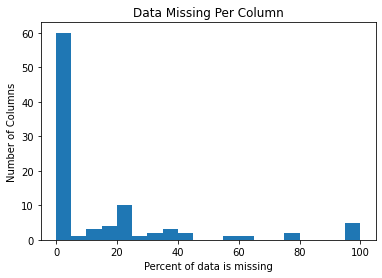

In [0]:
plt.hist(percent_missing_by_column,bins=20)
plt.xlabel('Percent of data is missing')
plt.ylabel('Number of Columns')
plt.title('Data Missing Per Column')


Taking  out the columns with 100% of the data is missing. 

In [0]:

outliers_columns=percent_missing_by_column[percent_missing_by_column>90]
outliers_columns=outliers_columns.index.tolist()
print("These are the columns which will be dropped: \n {}".format(outliers_columns))

These are the columns which will be dropped: 
 ['neighbourhood_group_cleansed', 'square_feet', 'has_availability', 'license', 'jurisdiction_names']


In [0]:
df_listings.drop(outliers_columns, axis=1, inplace=True)

### Question 1

### Is there a spatial discrepancy in price based on neighborhood?

Knowing particular neighborhood which is consistently more popular and relate this to price.

In [0]:
# Getting an idea of neighborhood clustering as it stands. The neighborhood_cleansed column does this for us.
df_listings.neighbourhood_cleansed.value_counts()




Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Bay Village                 24
Mattapan                    24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [0]:

# The price column has a $ sign and a comma indicating values over $1,000. We need to remove this to make analysis
# easier for us. Since we will likely have more data cleaning to do with signs, lets make a function.

# Old Values
display(df_listings.price.sort_values().head(5))

# Sign Replacement function
def replace_sign(dataframe,sign):
    if type(dataframe) is str:
        dataframe = float(dataframe.replace(sign,'').replace(',',''))
    return dataframe
# New Values
df_listings['price'] = df_listings['price'].apply(replace_sign,sign='$')
display(df_listings['price'].sort_values(ascending=False).head(5))

1764    $1,000.00
3242    $1,000.00
1896    $1,235.00
3096    $1,250.00
1262    $1,250.00
Name: price, dtype: object

2285    4000.0
3055    3000.0
793     1400.0
2204    1372.0
1950    1345.0
Name: price, dtype: float64

In [0]:

boston = df_listings[['name','latitude','longitude','neighbourhood_cleansed','price','amenities','bedrooms','bathrooms']].copy()
amenities_boston = boston['amenities'].map(lambda amens: "|".join([amen.replace("{","").replace("}","")
                                                          .replace('"',"") for amen in amens.split(',')]))
amenities_boston = amenities_boston.map(lambda amens: amens.split('|'))
boston['amenities'] = amenities_boston
boston.bedrooms = boston.bedrooms.fillna(0.5)
boston.bathrooms = boston.bathrooms.fillna(1)
boston = boston.query('price <= 600')

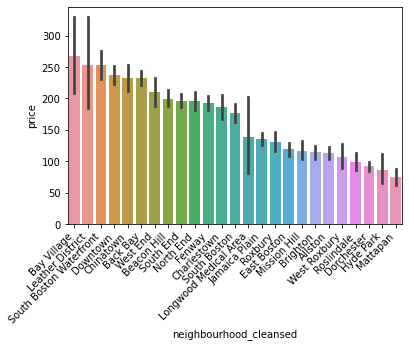

In [0]:
# Lets make a quick barplot to see what it looks like with the filters eliminating the upper outliers.
sns.barplot(x='neighbourhood_cleansed',y='price', data=boston.query('price <= 600'), order=boston.query('price <= 600')\
            .groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).index)
ax = plt.gca();
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
rcParams['figure.figsize'] = 15,5

In [0]:
expensive_prop = boston.price.quantile(q=.9)
cheap_prop = boston.price.quantile(q=.1)
print(" 90th percentile is: {}. This will be the expensive symbol.".format(expensive_prop))
print("10th percentile is: {}. This will be the cheap symbol.".format(cheap_prop))

 90th percentile is: 300.0. This will be the expensive symbol.
10th percentile is: 60.0. This will be the cheap symbol.


There are disparity of more expensive properties in near Downtown or Waterfront and  much cheaper properties farther away from the city, such as Hyde Park or Roslindale. 

## Inference

1.  The ones which are affordable look like rooms either in a dorm or a shared room of an apartment.

2. More expensive neighborhoods are downtown which intuitively makes sense.

3. The expensive AirBnBs farther away from Downtown are usually multiple bedrooms and bathrooms and possibly full-size mansions.


### Question 2

### What is the seasonality of price in Boston?


In [0]:
# Looking at the calendar data to see which is the most expensive and busiest time of year to visit
# Importing the data.

df_calendar.head()


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [0]:

# Spliting the date in order to do some analysis on month, day of the week, and year seasonality.
# Converting them to integers instead of object.
df_calendar['year'] = pd.to_datetime(df_calendar['date']).dt.year
df_calendar['month'] = pd.to_datetime(df_calendar['date']).dt.month
df_calendar['weekday'] = pd.to_datetime(df_calendar['date']).dt.dayofweek
df_calendar.head()

,listing_id,date,available,price,year,month,weekday
0,12147973,2017-09-05,f,NaN,2017,9,1
1,12147973,2017-09-04,f,NaN,2017,9,0
2,12147973,2017-09-03,f,NaN,2017,9,6
3,12147973,2017-09-02,f,NaN,2017,9,5
4,12147973,2017-09-01,f,NaN,2017,9,4


In [0]:
df_calendar['price'] = df_calendar['price'].apply(replace_sign,sign='$')
df_calendar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1308890 non-null  int64  
 1   date        1308890 non-null  object 
 2   available   1308890 non-null  object 
 3   price       643037 non-null   float64
 4   year        1308890 non-null  int64  
 5   month       1308890 non-null  int64  
 6   weekday     1308890 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 69.9+ MB


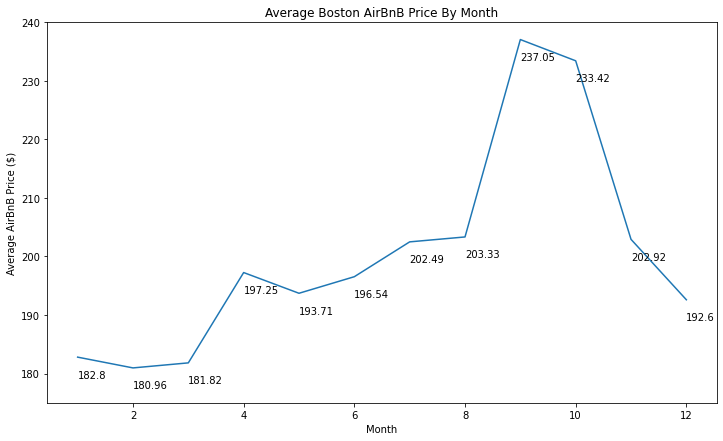

In [0]:

# Looking at price by month to see when is the most expensive and cheapest month to stay in a Boston AirBnB.
avg_price_per_month = round(df_calendar.groupby(['month']).mean()['price'],2)
ax = avg_price_per_month.plot(kind='line', title='Average Boston AirBnB Price By Month',figsize=(12,7));
ax.set(xlabel='Month', ylabel='Average AirBnB Price ($)');
ax.set_ylim(bottom=175.,top=240.)
for mon,price in avg_price_per_month.items():
    ax.annotate(str(price), xy=(mon, price),xytext=(mon,price-3.5))

## Price By Month

September and October are the most expensive months to visit Boston and stay in an AirBnB. 

In [0]:
# Looking at which day of the week is the most expensive to stay in AirBnB in Boston.
avg_price_per_wkday = round(calendar.groupby(['weekday']).mean()['price'],2)
ax1 = avg_price_per_wkday.plot(kind='line', title='Average Boston AirBnB Price By Day of Week',figsize=(12,7));
ax1.set(xlabel='Weekday (0 = Monday, 6 = Sunday)', ylabel='Average AirBnB Price ($)');
ax1.set_ylim(bottom=190.,top=210.)
for wkday,price in avg_price_per_wkday.items():
    ax1.annotate(str(price), xy=(wkday, price),xytext=(wkday+.1,price-.65))

## Price By Weekday

The difference between the mean of a weekend price and a weekday price is less than $10 or 5% of total cost.